Исследуем задержки авиарейсов, их величину и причины, их вызывающие. В основном исследуем средние значения задержек при фиксированных показателях(например, по месяцам, часам), а также погодные условия при этих же показателях и ищем взаимосвязи.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [55]:
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
fl2 = pd.read_csv(url1, sep=',')
fl2

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


In [4]:
fl = fl2.copy()
fl.loc[fl['hour']==24, 'hour'] = np.array([0] * len(fl[fl['hour']==24]))
fl

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


In [18]:
print(fl['dep_delay'].mean())

12.639070257304708


In [19]:
print(fl['arr_delay'].mean())

6.89537675731489


In [56]:
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
we = pd.read_csv(url2)
we

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8714,8715,JFK,2013,9.0,2.0,20.0,75.20,73.40,94.14,200.0,4.60312,5.297178,0.0,NaN,4.0
8715,8716,JFK,2013,10.0,23.0,10.0,48.92,39.02,68.51,60.0,4.60312,5.297178,0.0,1008.1,10.0
8716,8717,JFK,2013,10.0,23.0,11.0,48.92,39.02,68.51,40.0,4.60312,5.297178,0.0,1008.5,10.0
8717,8718,JFK,2013,12.0,17.0,5.0,26.96,10.94,50.34,40.0,4.60312,5.297178,0.0,1023.9,10.0


In [57]:
we = we.drop(we.columns[[0,1]], axis='columns')
we

,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8714,2013,9.0,2.0,20.0,75.20,73.40,94.14,200.0,4.60312,5.297178,0.0,NaN,4.0
8715,2013,10.0,23.0,10.0,48.92,39.02,68.51,60.0,4.60312,5.297178,0.0,1008.1,10.0
8716,2013,10.0,23.0,11.0,48.92,39.02,68.51,40.0,4.60312,5.297178,0.0,1008.5,10.0
8717,2013,12.0,17.0,5.0,26.96,10.94,50.34,40.0,4.60312,5.297178,0.0,1023.9,10.0


In [58]:
df = fl.merge(we)
df

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,18,2013,1,1,600.0,0.0,851.0,-7.0,B6,N595JB,...,0.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,19,2013,1,1,600.0,0.0,837.0,12.0,MQ,N542MQ,...,0.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
2,20,2013,1,1,601.0,1.0,844.0,-6.0,B6,N644JB,...,1.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
3,21,2013,1,1,602.0,-8.0,812.0,-8.0,DL,N971DL,...,2.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
4,22,2013,1,1,602.0,-3.0,821.0,16.0,MQ,N730MQ,...,2.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327599,336766,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,...,40.0,68.00,53.06,58.80,150.0,5.75390,6.621473,0.0,1015.4,10.0
327600,336767,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,...,40.0,68.00,53.06,58.80,150.0,5.75390,6.621473,0.0,1015.4,10.0
327601,336768,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,...,41.0,68.00,53.06,58.80,150.0,5.75390,6.621473,0.0,1015.4,10.0
327602,336769,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,...,7.0,66.02,53.96,65.07,160.0,4.60312,5.297178,0.0,1015.6,10.0


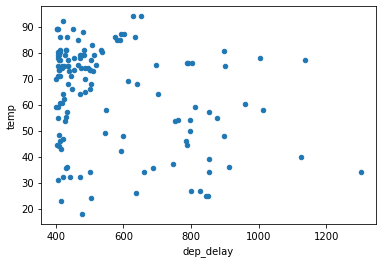

In [27]:
df[df['dep_delay']>400].plot.scatter('dep_delay','temp')
plt.show()

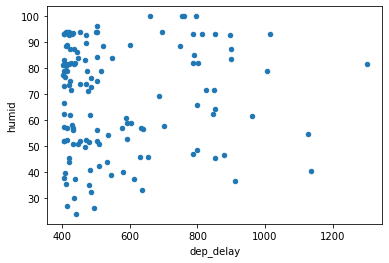

In [28]:
df[df['dep_delay']>400].plot.scatter('dep_delay','humid')
plt.show()

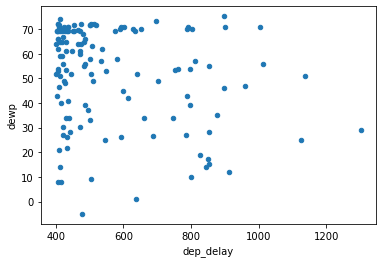

In [29]:
df[df['dep_delay']>400].plot.scatter('dep_delay','dewp')
plt.show()

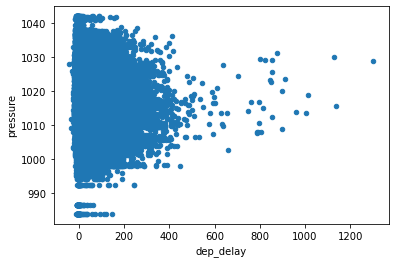

In [30]:
df.plot.scatter('dep_delay','pressure')
plt.show()

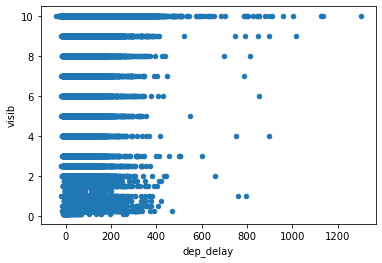

In [31]:
df.plot.scatter('dep_delay','visib')
plt.show()

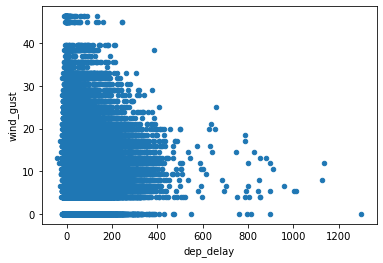

In [32]:
df[df['wind_gust']<200].plot.scatter('dep_delay','wind_gust')
plt.show()

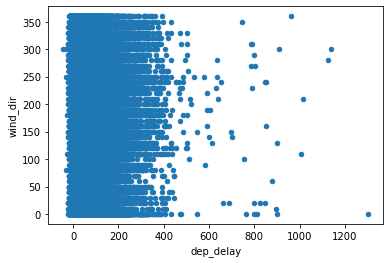

In [33]:
df.plot.scatter('dep_delay','wind_dir')
plt.show()

In [49]:
df.groupby('month')['dewp'].mean()

month
1     22.527474
2     21.457280
3     24.759313
4     34.296175
5     49.091992
6     59.929676
7     67.280183
8     60.643855
9     53.146403
10    46.364354
11    29.135652
12    28.305362
Name: dewp, dtype: float64

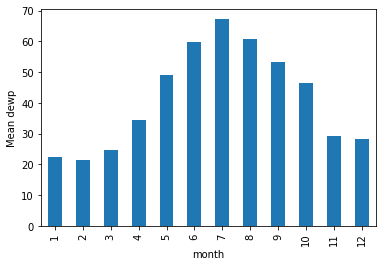

In [48]:
df.groupby('month')['dewp'].mean().plot.bar()
plt.ylabel('Mean dewp')
plt.show()

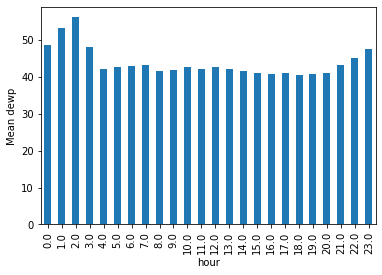

In [65]:
df.groupby('hour')['dewp'].mean().plot.bar()
plt.ylabel('Mean dewp')
plt.show()

In [45]:
df.groupby('month')['temp'].mean()

month
1     35.559281
2     34.502715
3     40.096557
4     53.192257
5     63.373905
6     73.271566
7     80.784126
8     74.564312
9     67.241766
10    59.695399
11    45.031772
12    38.224994
Name: temp, dtype: float64

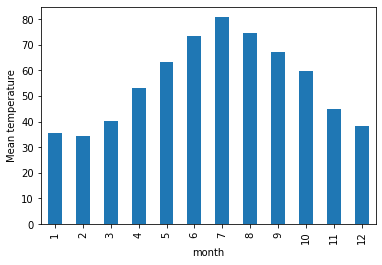

In [63]:
df.groupby('month')['temp'].mean().plot.bar()
plt.ylabel('Mean temperature')
plt.show()

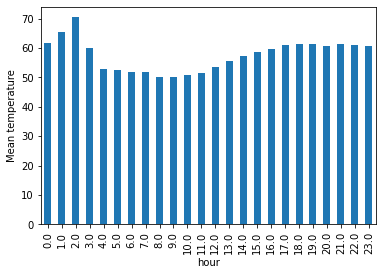

In [64]:
df.groupby('hour')['temp'].mean().plot.bar()
plt.ylabel('Mean temperature')
plt.show()

In [59]:
df.groupby('month')['visib'].mean()

month
1     8.587329
2     8.834087
3     9.291656
4     9.608072
5     8.785889
6     9.398913
7     9.595866
8     9.547016
9     9.700861
10    9.413313
11    9.516918
12    8.382922
Name: visib, dtype: float64

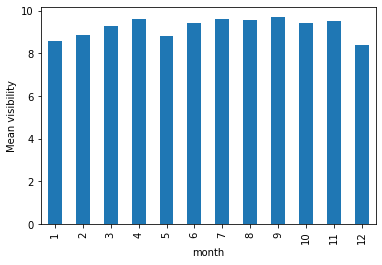

In [62]:
df.groupby('month')['visib'].mean().plot.bar()
plt.ylabel('Mean visibility')
plt.show()

In [60]:
df.groupby('month')['humid'].mean()

month
1     61.675605
2     61.597792
3     57.079640
4     53.423812
5     63.537378
6     65.787748
7     65.887224
8     64.760964
9     63.401313
10    64.220857
11    56.346564
12    69.077689
Name: humid, dtype: float64

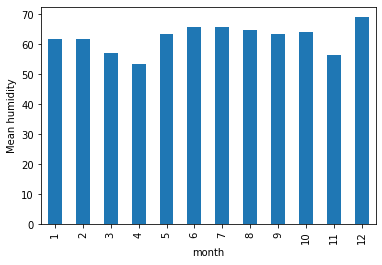

In [61]:
df.groupby('month')['humid'].mean().plot.bar()
plt.ylabel('Mean humidity')
plt.show()

In [34]:
fl.groupby('hour')['dep_delay'].mean()

hour
0.0     126.609890
1.0     207.049327
2.0     239.921875
3.0     304.727273
4.0      -5.554098
5.0      -4.355644
6.0      -1.520552
7.0       0.223289
8.0       1.091432
9.0       4.268295
10.0      5.548644
11.0      5.652309
12.0      7.601892
13.0      9.380639
14.0      8.090381
15.0     10.682049
16.0     13.621150
17.0     16.756593
18.0     18.664671
19.0     21.497342
20.0     28.266213
21.0     42.064964
22.0     68.190042
23.0     96.946865
Name: dep_delay, dtype: float64

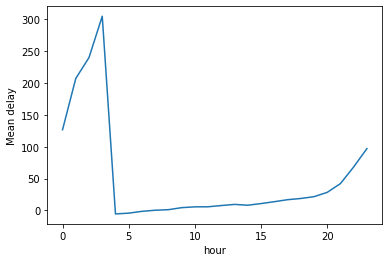

In [35]:
fl.groupby('hour')['dep_delay'].mean().plot()
plt.ylabel('Mean delay')
plt.show()

In [36]:
fl.groupby('month')['dep_delay'].mean()

month
1     10.036665
2     10.816843
3     13.227076
4     13.938038
5     12.986859
6     20.846332
7     21.727787
8     12.611040
9      6.722476
10     6.243988
11     5.435362
12    16.576688
Name: dep_delay, dtype: float64

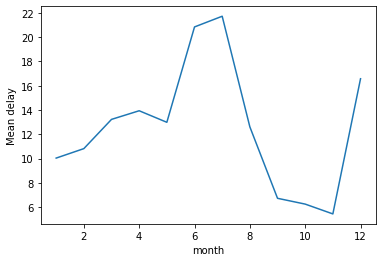

In [37]:
fl.groupby('month')['dep_delay'].mean().plot()
plt.ylabel('Mean delay')
plt.show()

In [8]:
fl.groupby('hour')['arr_delay'].mean()

hour
0.0     118.882873
1.0     195.959276
2.0     224.650794
3.0     287.727273
4.0      -8.875410
5.0      -8.850899
6.0      -7.091174
7.0      -7.351348
8.0      -4.026814
9.0      -1.062646
10.0     -0.510386
11.0      0.097894
12.0      2.255180
13.0      4.236094
14.0      2.327057
15.0      6.508259
16.0      7.387615
17.0     11.325378
18.0     13.389176
19.0     14.594484
20.0     21.631670
21.0     35.597306
22.0     62.082402
23.0     90.738113
Name: arr_delay, dtype: float64

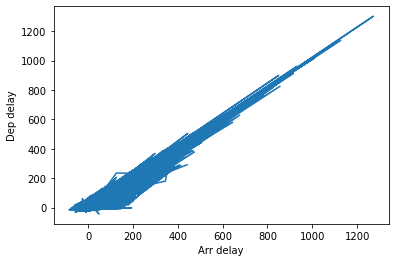

In [13]:
plt.plot(fl['arr_delay'],fl['dep_delay'])
plt.xlabel('Arr delay')
plt.ylabel('Dep delay')
plt.show()

In [18]:
df.groupby('hour')['wind_gust'].mean()

hour
0.0      9.842849
1.0      9.555112
2.0      8.297533
3.0      8.427329
4.0      8.885449
5.0      8.915258
6.0      8.526006
7.0      8.406873
8.0     11.841334
9.0      8.524016
10.0     8.856024
11.0     9.282578
12.0     9.942787
13.0    10.749102
14.0    10.991548
15.0    11.376381
16.0    12.443829
17.0    12.577742
18.0    12.895151
19.0    13.231637
20.0    13.035894
21.0    12.815633
22.0    12.235099
23.0    11.436629
Name: wind_gust, dtype: float64

In [47]:
m = [fl[fl['month']==i].groupby('day')['dep_delay'].mean().to_numpy() for i in range(1,13)]
n = np.concatenate((m))
n1 = [n[(i+6)%7::7].mean() for i in range(7)]
n1

[15.206575902581648,
 10.796491586311067,
 12.09750411853639,
 16.54870086806182,
 14.994129570546615,
 7.716067079056521,
 11.679866242456942]

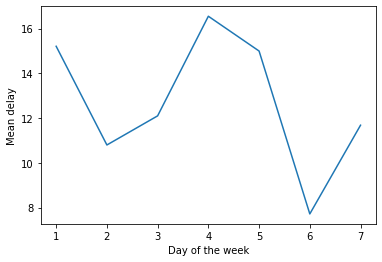

In [50]:
plt.plot(np.arange(1,8),n1)
plt.xlabel('Day of the week')
plt.ylabel('Mean delay')
plt.show()

В результате исследования задержек нам удалось выявить некоторые взаимосвязи. Средние задержки велики в ночное время(до 4 утра), и начиная с 4 утра, когда они самые маленькие, постепенно увеличиваются. Если смотреть по месяцам, то видно, что наибольшие задержки летом(июнь, июль) и в декабре, что логично(летом люди летят на отдых, зимой на праздники к родственникам). За неделю наибольшие проблемы возникают по понедельникам, средам и четвергам.
Также летом повышенная температура, росистость, возможны задержки из-за этого. В декабре же наблюдалась наибольшая влажность и наименьшая видимость, что также влияло на задержки. В общем экстремальные показатели по различным погодным показателям несильно влияли на задержки, но всё же немного чаще задержки из-за этого были больше среднего. Таким образом, персоналам аэропортов следует учитывать эти закономерности и принимать всевозможные меры для уменьшения задержек.